<a href="https://colab.research.google.com/github/franciscogarate/matact4fbs/blob/main/notebooks/5_Introduccion_GLM_alquiler_bicis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción regresión con GLM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!git clone https://github.com/franciscogarate/matact4fbs

Cloning into 'matact4fbs'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 50 (delta 20), reused 18 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (50/50), 1.24 MiB | 3.74 MiB/s, done.
Resolving deltas: 100% (20/20), done.


Importamos el fichero de datos para posteriormente trabajar con el

In [3]:
df = pd.read_excel('matact4fbs/data/datos.xlsx')
df.head()

,temp,lluvia,alquileres
0,42,1,55
1,38,0,132
2,29,0,83
3,12,1,17
4,28,1,31


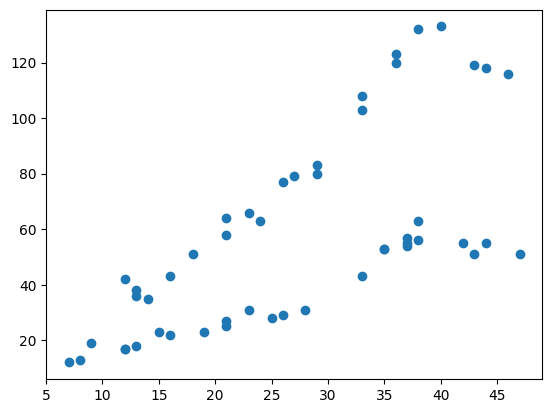

In [4]:
x = df.temp
y = df.alquileres
plt.scatter(x, y)
plt.show()

## Regresión lineal con scipy

In [5]:
import scipy.stats as st
lr = st.linregress(x,y)
lr

LinregressResult(slope=np.float64(2.029951413643245), intercept=np.float64(2.3077176619951913), rvalue=np.float64(0.6799789898553188), pvalue=np.float64(5.60463312698698e-08), stderr=np.float64(0.3159444288394127), intercept_stderr=np.float64(9.300579745654684))

In [6]:
lr.intercept, lr.slope

(np.float64(2.3077176619951913), np.float64(2.029951413643245))

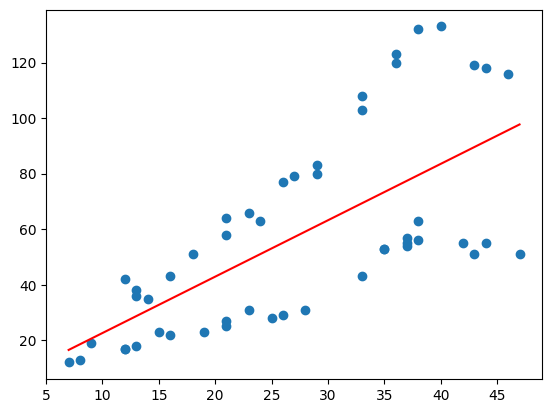

In [7]:
x_plot = np.linspace(x.min(), x.max(), 100)
y_plot = lr.intercept + lr.slope * x_plot
plt.plot(x_plot, y_plot, color='red')
plt.scatter(x, y)
plt.show()

## Regresión lineal con statsmodels

In [8]:
import numpy as np
import statsmodels.api as sm
x = df.temp
y = df.alquileres
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             alquileres   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     41.28
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           5.60e-08
Time:                        15:21:06   Log-Likelihood:                -232.01
No. Observations:                  50   AIC:                             468.0
Df Residuals:                      48   BIC:                             471.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3077      9.301      0.248      0.8

In [10]:
df['estimacion_lr'] = results.predict(sm.add_constant(x))
df['error_lr'] = results.resid
df.head()

,temp,lluvia,alquileres,estimacion_lr,error_lr
0,42,1,55,87.565677,-32.565677
1,38,0,132,79.445871,52.554129
2,29,0,83,61.176309,21.823691
3,12,1,17,26.667135,-9.667135
4,28,1,31,59.146357,-28.146357


Calcular RMSE

In [11]:
from sklearn.metrics import mean_squared_error

rmse_lr = np.sqrt(mean_squared_error(df.alquileres, df.estimacion_lr))
rmse_lr

np.float64(25.05968919860344)

## Regresión GLM con statsmodels

Primero usamos la regresión lineal = OLS (Minimos cuadraticos ordinarios)

In [12]:
import statsmodels.formula.api as smf

formula = 'alquileres ~ temp + lluvia'
model = smf.ols(formula=formula, data=df)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             alquileres   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     160.6
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           9.82e-22
Time:                        15:23:32   Log-Likelihood:                -196.06
No. Observations:                  50   AIC:                             398.1
Df Residuals:                      47   BIC:                             403.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.0799      5.038      5.574      0.0

In [13]:
model2 = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
result2 = model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             alquileres   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -171.46
Date:                Wed, 22 Oct 2025   Deviance:                       57.763
Time:                        15:23:36   Pearson chi2:                     56.9
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3013      0.060     54.697      0.0

In [16]:
df['estimacion_glm'] = result2.predict()
df['error_glm'] = result2.resid_response
df.head()

,temp,lluvia,alquileres,estimacion_lr,error_lr,estimacion_glm,error_glm
0,42,1,55,87.565677,-32.565677,58.138712,-3.138712
1,38,0,132,79.445871,52.554129,112.028141,19.971859
2,29,0,83,61.176309,21.823691,80.081694,2.918306
3,12,1,17,26.667135,-9.667135,18.988288,-1.988288
4,28,1,31,59.146357,-28.146357,34.488549,-3.488549


Calcular RMSE

In [17]:
rmse_glm = np.sqrt(mean_squared_error(df.alquileres, df.estimacion_glm))
rmse_glm

np.float64(9.922829409250353)

## Graficamos en 3D la formula con Temperatura y lluvia

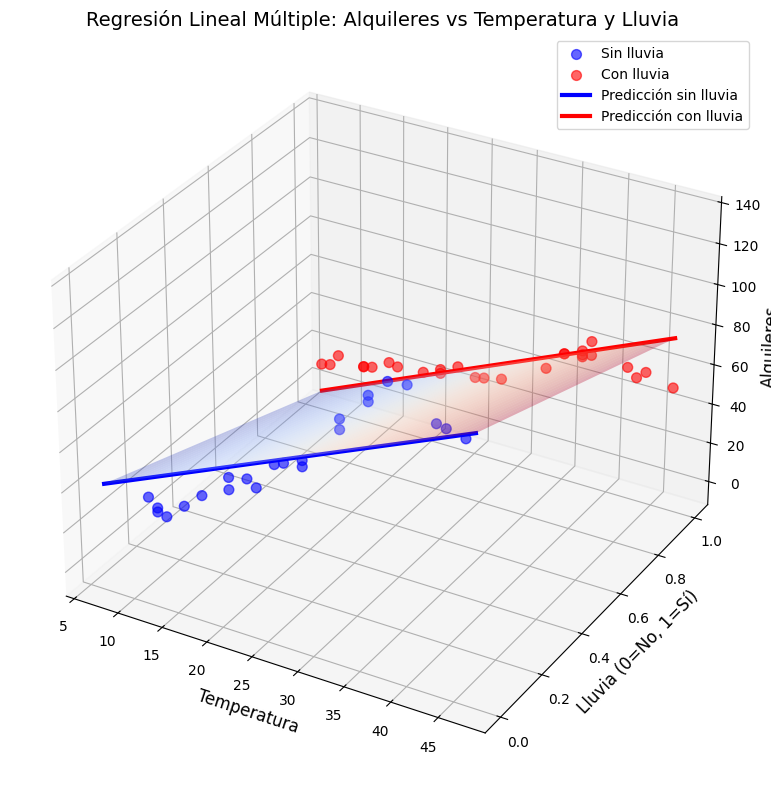

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Separamos por colores
sin_lluvia = df[df.lluvia == 0]
con_lluvia = df[df.lluvia == 1]

ax.scatter(sin_lluvia.temp, sin_lluvia.lluvia, sin_lluvia.alquileres,
           c='blue', marker='o', s=50, alpha=0.6, label='Sin lluvia')
ax.scatter(con_lluvia.temp, con_lluvia.lluvia, con_lluvia.alquileres,
           c='red', marker='o', s=50, alpha=0.6, label='Con lluvia')

temp_range = np.linspace(df.temp.min(), df.temp.max(), 50)

lluvia_0 = np.zeros(50)
pred_0 = results.predict(pd.DataFrame({'temp': temp_range, 'lluvia': lluvia_0}))
ax.plot(temp_range, lluvia_0, pred_0, color='blue', linewidth=3, label='Predicción sin lluvia')
lluvia_1 = np.ones(50)
pred_1 = results.predict(pd.DataFrame({'temp': temp_range, 'lluvia': lluvia_1}))
ax.plot(temp_range, lluvia_1, pred_1, color='red', linewidth=3, label='Predicción con lluvia')

# superficie entre los dos planos
temp_mesh, lluvia_mesh = np.meshgrid(temp_range, [0, 1])
alquiler_mesh = results.predict(pd.DataFrame({
    'temp': temp_mesh.ravel(),
    'lluvia': lluvia_mesh.ravel()
})).values.reshape(temp_mesh.shape)

ax.plot_surface(temp_mesh, lluvia_mesh, alquiler_mesh, alpha=0.3, cmap='coolwarm')

# Etiquetas
ax.set_xlabel('Temperatura', fontsize=12)
ax.set_ylabel('Lluvia (0=No, 1=Sí)', fontsize=12)
ax.set_zlabel('Alquileres', fontsize=12)
ax.set_title('Regresión Lineal Múltiple: Alquileres vs Temperatura y Lluvia', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:             alquileres   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -171.46
Date:                Wed, 22 Oct 2025   Deviance:                       57.763
Time:                        15:25:19   Pearson chi2:                     56.9
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3013      0.060     54.697      0.0

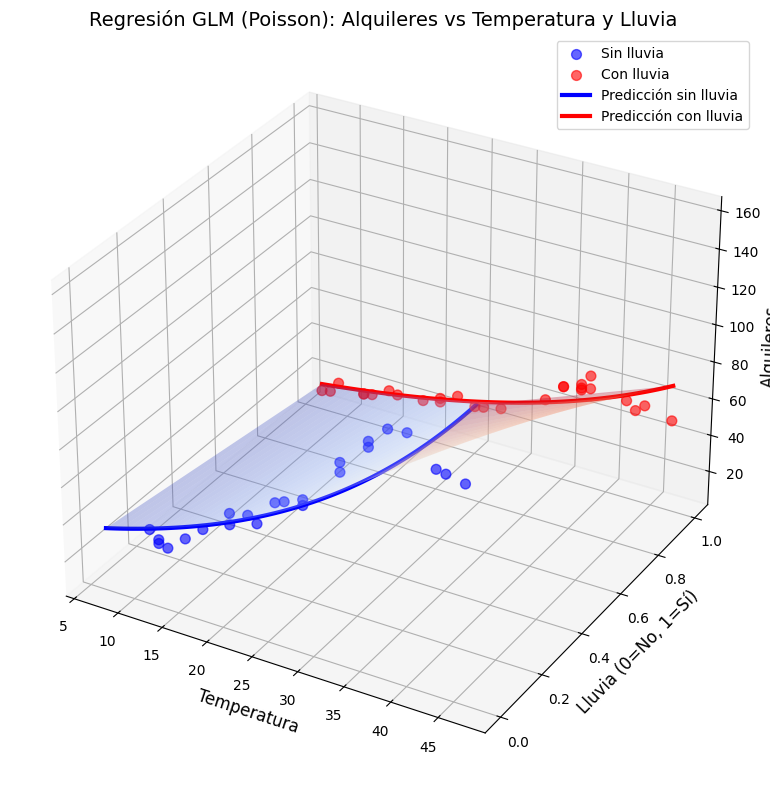

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Modelo GLM con Poisson
formula = 'alquileres ~ temp + lluvia'
model_glm = smf.glm(formula=formula, data=df, family=sm.families.Poisson())
result_glm = model_glm.fit()
print(result_glm.summary())

# Gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# separamos con colores:
sin_lluvia = df[df.lluvia == 0]
con_lluvia = df[df.lluvia == 1]

ax.scatter(sin_lluvia.temp, sin_lluvia.lluvia, sin_lluvia.alquileres,
           c='blue', marker='o', s=50, alpha=0.6, label='Sin lluvia')
ax.scatter(con_lluvia.temp, con_lluvia.lluvia, con_lluvia.alquileres,
           c='red', marker='o', s=50, alpha=0.6, label='Con lluvia')

temp_range = np.linspace(df.temp.min(), df.temp.max(), 100)
pred_0 = result_glm.predict(pd.DataFrame({'temp': temp_range, 'lluvia': np.zeros(100)}))
ax.plot(temp_range, np.zeros(100), pred_0, color='blue', linewidth=3, label='Predicción sin lluvia')
pred_1 = result_glm.predict(pd.DataFrame({'temp': temp_range, 'lluvia': np.ones(100)}))
ax.plot(temp_range, np.ones(100), pred_1, color='red', linewidth=3, label='Predicción con lluvia')

# Superficie
temp_mesh, lluvia_mesh = np.meshgrid(temp_range, [0, 1])
alquiler_mesh = result_glm.predict(pd.DataFrame({
    'temp': temp_mesh.ravel(),
    'lluvia': lluvia_mesh.ravel()
})).values.reshape(temp_mesh.shape)

ax.plot_surface(temp_mesh, lluvia_mesh, alquiler_mesh, alpha=0.3, cmap='coolwarm')

ax.set_xlabel('Temperatura', fontsize=12)
ax.set_ylabel('Lluvia (0=No, 1=Sí)', fontsize=12)
ax.set_zlabel('Alquileres', fontsize=12)
ax.set_title('Regresión GLM (Poisson): Alquileres vs Temperatura y Lluvia', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()